# 正态方程

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

In [7]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.46813214],
       [2.99687472]])

In [9]:
X_new = np.array([[0],[2]])

In [10]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [21]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [11]:
y_predict = X_new_b.dot(theta_best)

In [12]:
y_predict

array([[ 4.46813214],
       [10.46188158]])

[0, 2, 0, 15]

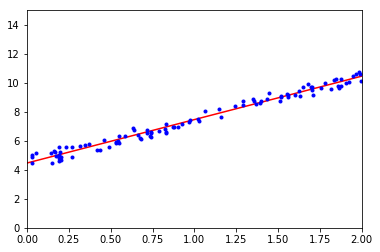

In [15]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lin_reg.intercept_,lin_reg.coef_

(array([4.46813214]), array([[2.99687472]]))

In [20]:
lin_reg.predict(X_new)

array([[ 4.46813214],
       [10.46188158]])

# 随机梯度下降

In [22]:
eta = .1
n_literation = 1000
m = 100

In [23]:
theta = np.random.rand(2,1)

In [26]:
for iteration in range(n_literation):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [27]:
theta

array([[4.46813214],
       [2.99687472]])

In [28]:
from sklearn.linear_model import SGDRegressor

In [29]:
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [34]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.47868679]), array([3.00773605]))

# 多项式回归

In [35]:
m = 100
X = 6*np.random.rand(m,1)-3
y = .5*X**2+X+2+np.random.randn(m,1)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [38]:
X_poly = poly_features.fit_transform(X)

In [41]:
X[0]

array([-2.18232555])

In [42]:
X_poly[0]

array([-2.18232555,  4.76254482])

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.03167538]), array([[1.04197512, 0.4906299 ]]))

In [44]:
y_predict = lin_reg.predict(X_poly)

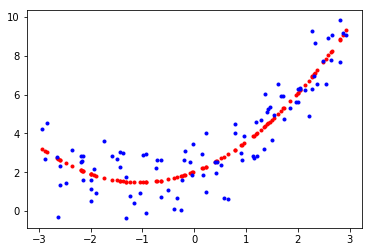

In [50]:
plt.plot(X,y_predict,"r.",linewidth=2, label="Predictions")
plt.plot(X,y,'b.')
# plt.axis([0,2,0,15])